In [1]:
%load_ext autoreload
%load_ext autotime

time: 334 µs (started: 2023-09-23 16:19:56 -07:00)


In [2]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings('ignore')
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

time: 1.76 s (started: 2023-09-23 16:19:56 -07:00)


In [3]:
import dask
import dask.dataframe as dd
import numpy as np
import pandas as pd
print('pandas', pd.__version__)
print('dask', dask.__version__)
print('numpy', np.__version__)

pandas 1.5.3
dask 2022.12.1
numpy 1.21.0
time: 757 ms (started: 2023-09-23 16:20:13 -07:00)


In [4]:
%autoreload 2

from wisio.recorder import RecorderAnalyzer

log_dir = "/p/gpfs1/iopp/recorder_app_logs/lbann-cosmoflow/nodes-32/_parquet"

analyzer = RecorderAnalyzer(
    cluster_manager_args=dict(
#         force_local=True,
        cluster_settings=dict(
#             cores=4,
            dashboard_port=3691,
            local_directory="/var/tmp/dask-recorder/cosmoflow",
            log_file="%J.log",
            worker_queue="pdebug"
        )
    ),
    working_dir='.recorder',
    debug=True
) 

analyzer

time: 1.7 s (started: 2023-09-23 16:20:36 -07:00)


In [5]:
client = analyzer.cluster_manager.clients[0]
client

Connection method: Cluster object,Cluster type: dask_jobqueue.LSFCluster
Dashboard: http://192.168.66.200:3691/status,
Dashboard: http://192.168.66.200:3691/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://192.168.66.200:46801,Workers: 0
Dashboard: http://192.168.66.200:3691/status,Total threads: 0
Started: Just now,Total memory: 0 B


time: 39.6 ms (started: 2023-09-23 16:20:49 -07:00)


In [6]:
%autoreload 2

result = analyzer.analyze_parquet(log_dir=log_dir, checkpoint=False, metrics=['duration'])

time: 2min 43s (started: 2023-09-23 16:21:18 -07:00)


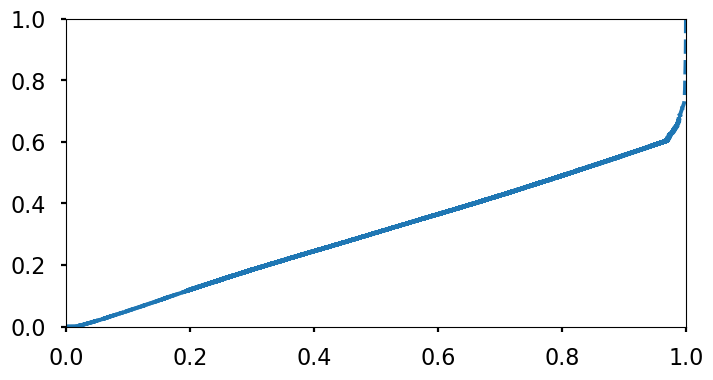

time: 2.35 s (started: 2023-09-23 16:24:39 -07:00)


In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
fig, ax = result.plot.slope(
    metric='duration', 
    view_keys=[('time_range',)], #, ('file_name',), ('proc_name',)],
    figsize=(8, 4)
)
# fig

(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x200040408ac0>)

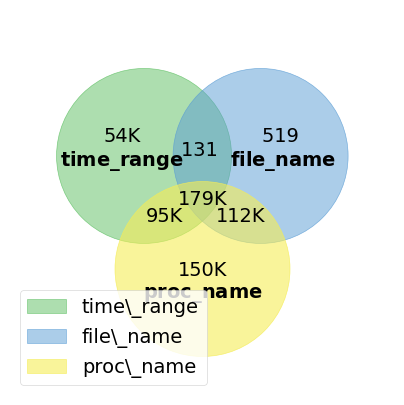

time: 6.58 s (started: 2023-09-23 16:25:25 -07:00)


In [8]:
result.plot.view_relations3('duration', ('time_range',), ('file_name',), ('proc_name',))

In [11]:
len(result.main_view.index)

829067

time: 410 ms (started: 2023-09-23 16:27:03 -07:00)
